In [106]:
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [107]:
%matplotlib notebook

In [108]:
D = 1
t0 = .1
t_array = linspace(t0,.8,101)
x_array = linspace(0,2,100)
x,t = meshgrid(x_array,t_array)
Z2tot = x**2*(t0/t)**1.0*exp(-x**2/(2*D*t))/(4*D**2*t**2)

<IPython.core.display.Javascript object>


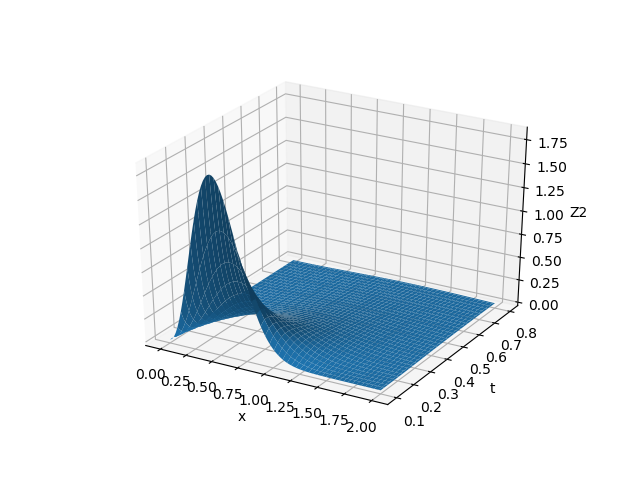

Text(0.5,0,'Z2')

In [109]:
ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 
ax.plot_surface(x,t, Z2tot) # Make the mesh plot
ax.set_xlabel('x') # Label axes
ax.set_ylabel('t')
ax.set_zlabel('Z2')

In [110]:
Z2totSize = np.size(Z2tot)
Z2tot_long = np.reshape(Z2tot, Z2totSize)
mybins = np.linspace(0,2,10)
counts, bins = np.histogram(Z2tot_long,mybins)
print(counts)
print(bins)
print('ratio = ', counts[0]/counts[-1])
counts = counts/sum(counts)

[9164  526  185   96   55   34   23   11    6]
[0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]
ratio =  1527.3333333333333


<IPython.core.display.Javascript object>


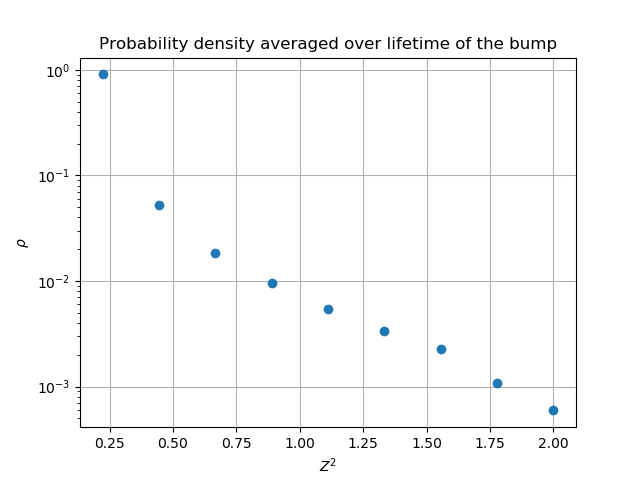

Text(0.5,1,'Probability density averaged over lifetime of the bump')

In [119]:
plt.figure()
plt.semilogy(bins[1:], counts, 'o', label='Numerical result')
plt.grid(True)
plt.xlabel('$Z^2$')
plt.ylabel(r'$\rho$')
plt.grid(True)
plt.title('Probability density averaged over lifetime of the bump')

<IPython.core.display.Javascript object>


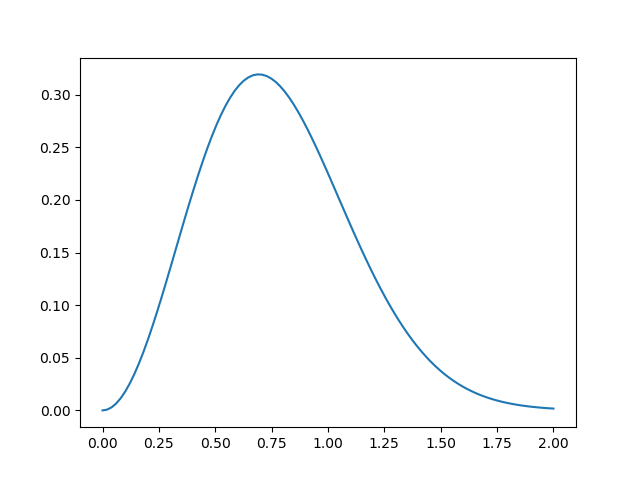

In [115]:
Z2totslice = Z2tot[20,:]
plt.figure()
plt.plot(x_array,Z2totslice)

<IPython.core.display.Javascript object>


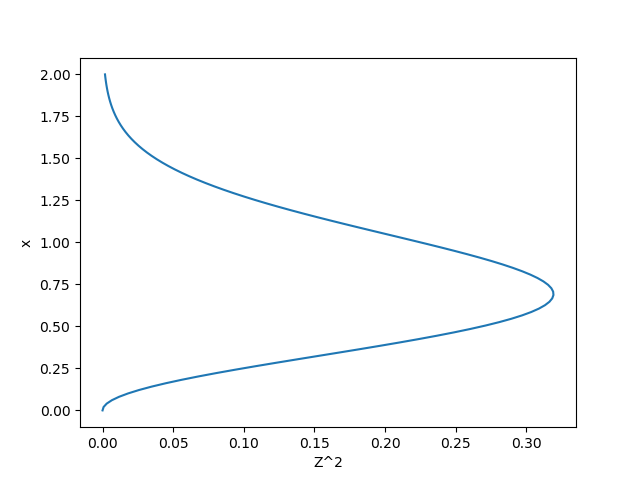

Text(0,0.5,'x')

In [116]:
plt.figure()
plt.plot(Z2totslice,x_array)
plt.xlabel('Z^2')
plt.ylabel('x')

<IPython.core.display.Javascript object>


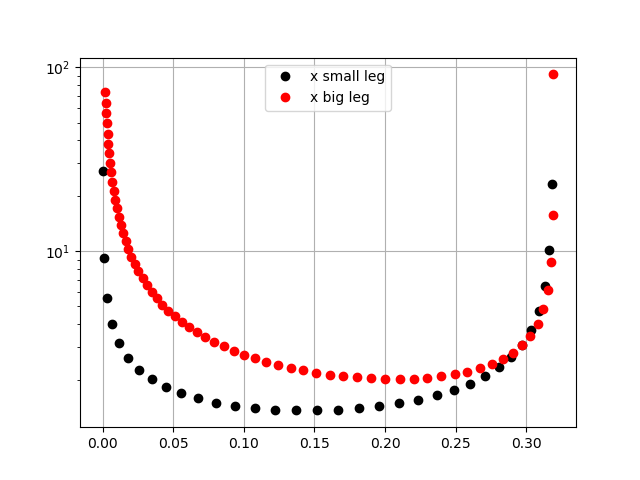

In [117]:
dxdZ2 = np.diff(x_array)/np.diff(Z2totslice)
idxdZ2 = np.argwhere(dxdZ2>0)
jdxdZ2 = np.argwhere(dxdZ2<0)
# print(dxdZ2[idxdZ2])
# print(dxdZ2[jdxdZ2])

plt.figure()
plt.semilogy(Z2totslice[idxdZ2],dxdZ2[idxdZ2],'ko',label='x small leg')
plt.semilogy(Z2totslice[jdxdZ2],-dxdZ2[jdxdZ2],'ro',label='x big leg')
plt.grid(True)
plt.legend()